# Produit de convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import signalfip as sig

## Premier produit de convolution

Comme pour la porte, l'impulsion discrète est définie avec `numpy.where`.

Attention à l'utilisation de la fonction `numpy.arange` utilisée pour définir les abscissess !

In [2]:
n = np.arange(-10, 10+1)

In [3]:
x = np.sin(2*np.pi*n/10)
y = np.where( n==5 , 3, 0)

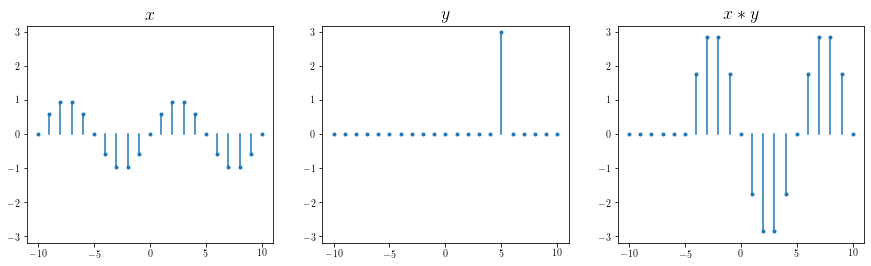

In [4]:
z = np.convolve(x, y, mode="same")

ylim=[-3.2, 3.2]
titles = ["x", "y", "x*y"]
plt.rc('text', usetex=True)
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    sig.stem(n, s)
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* On voit là l'effet de la convolution par une impulsion discrète :
  le signal $x$ est décalé de 5 échantillons (lieu de l'impulsion) et amplifié de 3 (amplitude de l'impulsion).
* Mais comment expliquer la présence d'échantillons nuls en début du signal $x*y$ ?

## Deuxième produit de convolution

In [5]:
n = np.arange(-10, 10+1)
x = np.where( np.absolute(n)==1 , 1, 0) + np.where( n==0 , 2, 0)
y = np.where( n==-1 , -1, 0) + np.where( n==1 , 1, 0)

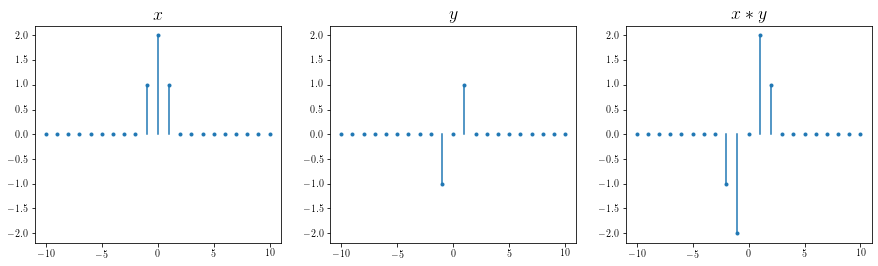

In [6]:
z = np.convolve(x, y, mode="same")

ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.rc('text', usetex=True)
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    sig.stem(n, s)
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

Détail du calcul du produit de convolution :

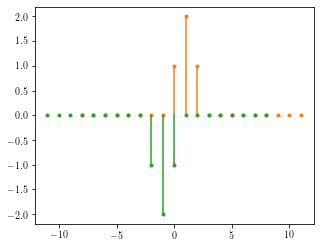

In [7]:
ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.rc('text', usetex=True)
plt.figure(figsize=(5,4))
sig.stem(n[1:]+1, x[1:], "tab:orange")
sig.stem(n[:-1]-1, -x[:-1], "tab:green")
plt.ylim(ylim)
# plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* Comme précédemment, la convolution par chaque impulsion de $y$ va décaler et amplifer le signal $x$ d'autant. La convolution de la somme étant la somme des convolutions (opération linéaire), alors le résultat $x*y$ est la somme des deux convolutions.

## Troisième produit de convolution

In [8]:
# https://www.kaggle.com/robikscube/hourly-energy-consumption
x = np.loadtxt("AEP-2005.csv", delimiter=',', skiprows=0)
N = len(x)
t = np.arange(N) / 24 + 1

D = 24*7
y = np.ones(D) / D

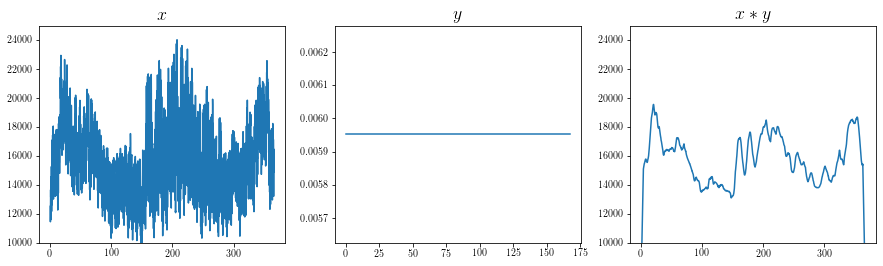

In [9]:
z = np.convolve(x, y, mode="same")

plt.rc('text', usetex=True)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.ylim([10e3, 25e3])
plt.title("$x$", fontsize=18)

plt.subplot(1,3,2)
plt.plot(y)
plt.title("$y$", fontsize=18)

plt.subplot(1,3,3)
plt.plot(t, z)
plt.ylim([10e3, 25e3])
plt.title("$x*y$", fontsize=18)

plt.show()

* La convolution par un porte revient à calculer chaque échantillon de $x*y$ comme la moyenne de 24×7 échantillons de $y$.
* On procède donc à un moyennage du signal, qui a pour effet d'adoucir (lisser) le signal très perturbé ("bruité") par une porte.
  C'est une véritable technique pour débruiter un signal.